# Data analysis

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
# INDICATOR = ['quintilAlfabetizacao','quintilRenda']
# INDICATOR_PRED = ['quintilAlfabetizacaoPred','quintilRendaPred']
# INDICATOR_TITLE= ['Literacy', 'Income']
# FOLDER = ['literacy','income']
INDICATOR = ['quintilRenda']
INDICATOR_PRED = ['quintilRendaPred']
INDICATOR_TITLE= ['Income']
FOLDER = ['incomegpu']

## Distribution of socioeconomic indicators per census sectors

### Number of street images used for training

In [52]:
for s in range(0,len(INDICATOR)):
    df = pd.concat([pd.read_csv(f'{FOLDER[s]}/folds/fold-{FOLD}.csv', 
                            usecols=['filename','latitude','longitude','setor','fold',INDICATOR[s]])
                for FOLD in range(0,5)], ignore_index=True)  
    df['photos'] = df['filename'].notna().astype(int)        
    ds = pd.DataFrame(df.groupby(INDICATOR[s])['photos'].sum().reset_index())
    df_new = ds.rename(columns={INDICATOR[s]: INDICATOR_TITLE[s]})
    #display(df_new)
    
    plt.figure(figsize=(4,3))    
    ax= sns.barplot(x= df_new[INDICATOR_TITLE[s]], y=df_new['photos'], color = 'black')
    #plt.title(INDICATOR_TITLE[s])    
    
    ax.set(xlabel=INDICATOR_TITLE[s] + ' score', ylabel='Number of street images used for training')
    ax.set(ylim=(0, 50000))
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'incomegpu/folds/fold-0.csv'

In [36]:
display(df_new)

display(df_new['photos'].sum())

,Income,photos
0,1.0,4828
1,2.0,8372
2,3.0,22688
3,4.0,28196
4,5.0,46740


110824

### Number of street images for prediction

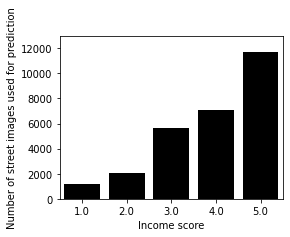

In [4]:
for s in range(0,len(INDICATOR)):
    df = pd.concat([pd.read_csv(f'{FOLDER[s]}/folds/pred-{FOLD}.csv') for FOLD in range(0,5)], ignore_index=True)  
    df['photos'] = df['setor'].notna().astype(int)        
    ds = pd.DataFrame(df.groupby(INDICATOR[s])['photos'].sum().reset_index())
    df_new = ds.rename(columns={INDICATOR[s]: INDICATOR_TITLE[s]})
    #display(df_new)
    
    plt.figure(figsize=(4,3))    
    ax= sns.barplot(x= df_new[INDICATOR_TITLE[s]], y=df_new['photos'], color = 'black')
    #plt.title(INDICATOR_TITLE[s])    
    
    ax.set(xlabel=INDICATOR_TITLE[s] + ' score', ylabel='Number of street images used for prediction')
    ax.set(ylim=(0, 13000))
    plt.show()

In [5]:
display(df_new)

display(df_new['photos'].sum())

,Income,photos
0,1.0,1207
1,2.0,2093
2,3.0,5672
3,4.0,7049
4,5.0,11685


27706

### Distribution of street images per scores

Hypothesis testing: Google images are from high scores

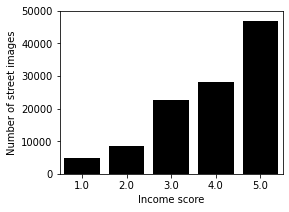

In [6]:
for s in range(0,len(INDICATOR)):
    geo = pd.read_csv('geo.csv',
                      usecols=['city','direction','filename','latitude','longitude','setor']) #this is not necessary, geo.csv is on all folders
    idh = pd.read_csv('IDHMs/IDHM_ValeRibeira.csv')

    df = pd.merge(geo, idh, left_on='setor', right_on='Cod_setor', how='left')
    df['photos'] = df['filename'].notna().astype(int)        
    ds = pd.DataFrame(df.groupby(INDICATOR[s])['photos'].sum().reset_index())
    df_new = ds.rename(columns={INDICATOR[s]: INDICATOR_TITLE[s]})
    #display(df_new)
    
    plt.figure(figsize=(4,3))    
    ax= sns.barplot(x= df_new[INDICATOR_TITLE[s]], y=df_new['photos'], color = 'black')
    #plt.title(INDICATOR_TITLE[s])    
    
    ax.set(xlabel=INDICATOR_TITLE[s] + ' score', ylabel='Number of street images')
    ax.set(ylim=(0, 50000))
    plt.show()

In [7]:
display(df_new)

display(df_new['photos'].sum())

,Income,photos
0,1.0,4828
1,2.0,8372
2,3.0,22688
3,4.0,28196
4,5.0,46740


110824

## Street view images

In [8]:
from PIL import Image
from urllib.parse import urlencode
import random
import requests
from tqdm import tqdm 

import numpy as np
np.random.seed(286571) #seed random generator for reproduciblity

In [9]:
def get_image(pano_id, direction):
    y_ = []
    for y in range(2):
        params = {
            "cb_client": "maps_sv.tactile",
            "authuser": 0,
            "hl": "en",
            "gl": "br",
            "x": direction // 90,
            "y": y,
            "zoom": 2,
            "nbt": None,
            "fover": 0,
            "output": "tile",
            "panoid": pano_id,
        }
        url = f"https://geo{np.random.randint(0, 3)}.ggpht.com/cbk?{urlencode(params)}"
        img = np.asarray(Image.open(requests.get(url, stream=True).raw))
        y_.append(img[256:, :, :] if y == 0 else img[:256, :, :])
    return np.concatenate(y_)

def plot_image(score, w,h):
    _, axs = plt.subplots(w, h, figsize=(5,5))
    plt.suptitle(f'Samples for {INDICATOR_TITLE[s]} with score = {score}')      

    sample = ds[ds[INDICATOR[s]] == score].sample(w*h)
    for i in tqdm(range(0,w * h), leave=False):            
        row = sample.iloc[i] 
        print('Setor:', row['setor'], ' Lat:', row['latitude'], ' Long:', row['longitude'])
        axs[i%w][i//h].imshow(get_image(row['pano_id'], row['direction']))

  0%|          | 0/4 [00:00<?, ?it/s]

Cidade:  CERRO AZUL  Setor: 410520105000006.0  Lat: -24.84451757030593  Long: -49.23259141434286  File: Cdes1nvlQSwZfbut05R4gw-180.jpg  Score: 1


 25%|██▌       | 1/4 [00:02<00:06,  2.29s/it]

Cidade:  ADRIANÓPOLIS  Setor: 410020205000010.0  Lat: -24.6833307  Long: -48.8144408  File: HVMhJ_G0lsR5VO5GcY80rQ-180.jpg  Score: 1


 50%|█████     | 2/4 [00:03<00:04,  2.02s/it]

Cidade:  APIAÍ  Setor: 350270525000005.0  Lat: -24.41904863741698  Long: -48.86595919764146  File: uHyztv_gLrq02gOLDd01pw-270.jpg  Score: 1


 75%|███████▌  | 3/4 [00:05<00:01,  1.90s/it]

Cidade:  CERRO AZUL  Setor: 410520105000006.0  Lat: -24.8620966  Long: -49.2006615  File: rdgWnydnsE8-vUsbaBCoeg-180.jpg  Score: 1


  0%|          | 0/4 [00:00<?, ?it/s]        

Cidade:  RIO BRANCO DO SUL  Setor: 412220605000012.0  Lat: -25.18003622680294  Long: -49.31959545281271  File: 4r3njRVgd_GbVy_btO7ofw-180.jpg  Score: 3


 25%|██▌       | 1/4 [00:01<00:03,  1.12s/it]

Cidade:  RIO BRANCO DO SUL  Setor: 412220605000044.0  Lat: -25.217044411265878  Long: -49.303479446348256  File: dLK4EgW8iWGp1r8G3beh4Q-0.jpg  Score: 3


 50%|█████     | 2/4 [00:02<00:02,  1.12s/it]

Cidade:  JUQUIÁ  Setor: 352610005000016.0  Lat: -24.313055  Long: -47.6251363  File: n_e9r1Rk1a5efeQrrOB57Q-270.jpg  Score: 3


 75%|███████▌  | 3/4 [00:03<00:01,  1.29s/it]

Cidade:  ADRIANÓPOLIS  Setor: 410020205000004.0  Lat: -24.6785334789121  Long: -48.92372312979359  File: dmEoywfnH_npJGQUQVzi8g-180.jpg  Score: 3


  0%|          | 0/4 [00:00<?, ?it/s]        

Cidade:  ITARIRI  Setor: 352330510000023.0  Lat: -24.301228583533  Long: -47.07349095048085  File: 9nbDeClzB--ZHwItu6zDPQ-0.jpg  Score: 5


 25%|██▌       | 1/4 [00:00<00:02,  1.06it/s]

Cidade:  RIO BRANCO DO SUL  Setor: 412220605000004.0  Lat: -25.1882178  Long: -49.3221993  File: gWhzjlRD1Nv-8LKOTLUA2g-270.jpg  Score: 5


 50%|█████     | 2/4 [00:01<00:01,  1.07it/s]

Cidade:  JUQUITIBA  Setor: 352620910000005.0  Lat: -23.94523205196023  Long: -47.0975949848055  File: Ll4PEXLtlPlSFqGb-ifPVw-270.jpg  Score: 5


 75%|███████▌  | 3/4 [00:02<00:00,  1.02it/s]

Cidade:  REGISTRO  Setor: 354260205000012.0  Lat: -24.49003177074037  Long: -47.835670193360826  File: sEsZgM_ght4lAQUvvR626A-180.jpg  Score: 5


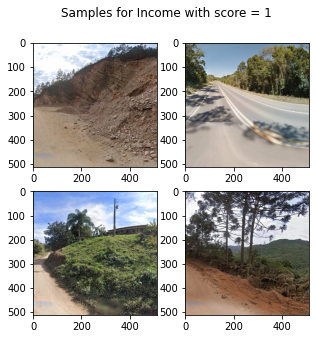

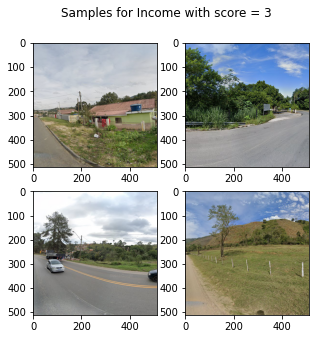

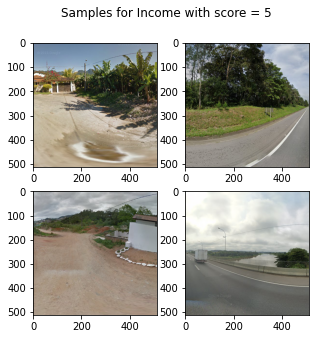

In [51]:
for s in range(0,len(INDICATOR)):
    df = pd.read_csv('geo_fold.csv') 
    idh = pd.read_csv('IDHMs/IDHM_ValeRibeira.csv')
    ds = pd.merge(df, idh, left_on='setor', right_on='Cod_setor', how='inner')
    
    plot_image(score=1, w=2,h=2)
    plot_image(score=3, w=2,h=2)
    plot_image(score=5, w=2,h=2)         
         

### Saving images samples

FileNotFoundError: [Errno 2] No such file or directory: 'incomegpu/score_images/Income-score-1-sample-4.png'

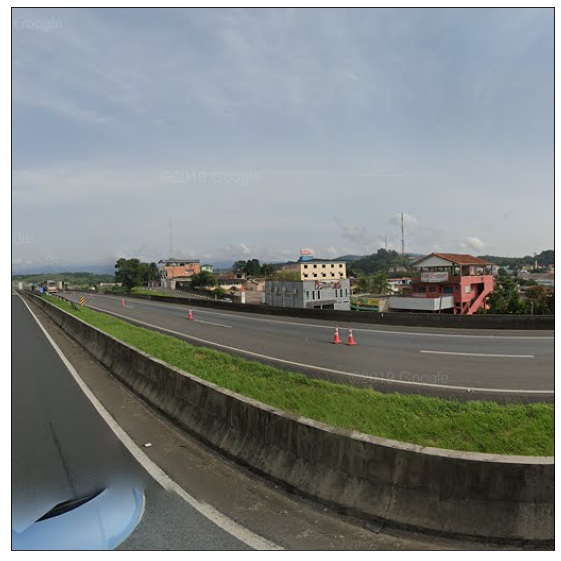

In [53]:
for s in range(0,len(INDICATOR)):
    df = pd.read_csv('geo_fold.csv')
    idh = pd.read_csv('IDHMs/IDHM_ValeRibeira.csv', usecols=['Cod_setor', INDICATOR[s]]) 
    #df = pd.read_csv('geo.csv')
    ds = pd.merge(df, idh, left_on='setor', right_on='Cod_setor', how='inner')


    for score in range(1, 5+1):            
        num_samples=6
        rand_samples =np.random.randint(200, size=num_samples) #4 samples
        sample = ds[ds[INDICATOR[s]] == score].sample(200)
        for c in range(0, num_samples):
            row = sample.iloc[rand_samples[c]]
            while True:
                try:                    
                    fig, axs = plt.subplots(1, 1, figsize=(10,10))
                    plt.imshow(get_image(row['pano_id'], row['direction']))
                    #plt.suptitle(f'Score {score}')
                    axs.axes.get_xaxis().set_visible(False)
                    axs.axes.get_yaxis().set_visible(False)
                    axs.set_aspect('equal')
                    break
                except OSError:
                    continue
                    
            plt.savefig(f'{FOLDER[s]}/score_images/{INDICATOR_TITLE[s]}-score-{score}-sample-{c+4}.png')
            plt.close()


# Prediction performance

## Socioeconomic indicators

In [10]:
for s in range(0,len(INDICATOR)):
    data = {f'fold {i}':{} for i in range(0,5)} 
    for i in range(0,5):#    
        for error in range(2): #'±0', '±1', '±2'            
            pred_fold = pd.read_csv(f'{FOLDER[s]}/folds/pred-{i}.csv')
            data[f'fold {i}'][error] = ((pred_fold[INDICATOR[s]]-pred_fold[INDICATOR_PRED[s]]).abs() <= error).astype(int).mean()
    r = pd.DataFrame(data)    
    r.index = ['±0', '±1']
    r.index.name = 'Margin'   
    print(INDICATOR_TITLE[s] + ' score')
    display(r)

Income score


,fold 0,fold 1,fold 2,fold 3,fold 4
Margin,,,,,
±0,0.540690,0.558460,0.551391,0.547795,0.539804
±1,0.841531,0.828153,0.840242,0.827543,0.840784


## Confusion matrix

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from IPython.display import display

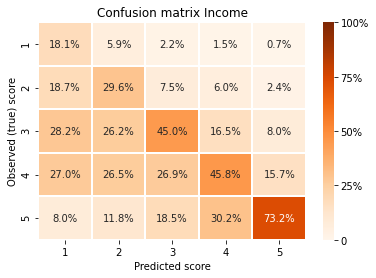

In [12]:
for s in range(0,len(INDICATOR)):
    df = pd.concat([pd.read_csv(f'{FOLDER[s]}/folds/pred-{FOLD}.csv') for FOLD in range(0,5)], ignore_index=True)
    
    cf = confusion_matrix(df[INDICATOR[s]], df[INDICATOR_PRED[s]])

    plt.figure(figsize=(6,4))
    ax=sns.heatmap((cf.T/cf.sum(axis=1)), xticklabels=range(1,5+1),yticklabels=range(1,5+1),
                annot=True, 
                fmt='.1%', cmap='Oranges',
                vmin=0, vmax=1,
               linewidths=1)
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, .25, .5, .75, 1])
    cbar.set_ticklabels(['0', '25%', '50%', '75%', '100%'])
    plt.title("Confusion matrix "+ INDICATOR_TITLE[s])
    plt.xlabel('Predicted score')
    plt.ylabel('Observed (true) score')    
    #plt.savefig(fname=f'plots/confmatrix-{INDICATOR_TITLE[s]}.pdf', dpi=300, facecolor='w', edgecolor='w')
    #plt.savefig(fname=f'plots/confmatrix-{INDICATOR_TITLE[s]}.png', dpi=300, facecolor='w', edgecolor='w')


In [13]:
cf.sum(axis=1).sum(axis=0)*4

110824

## Vale do Ribeira geomap prediction

In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

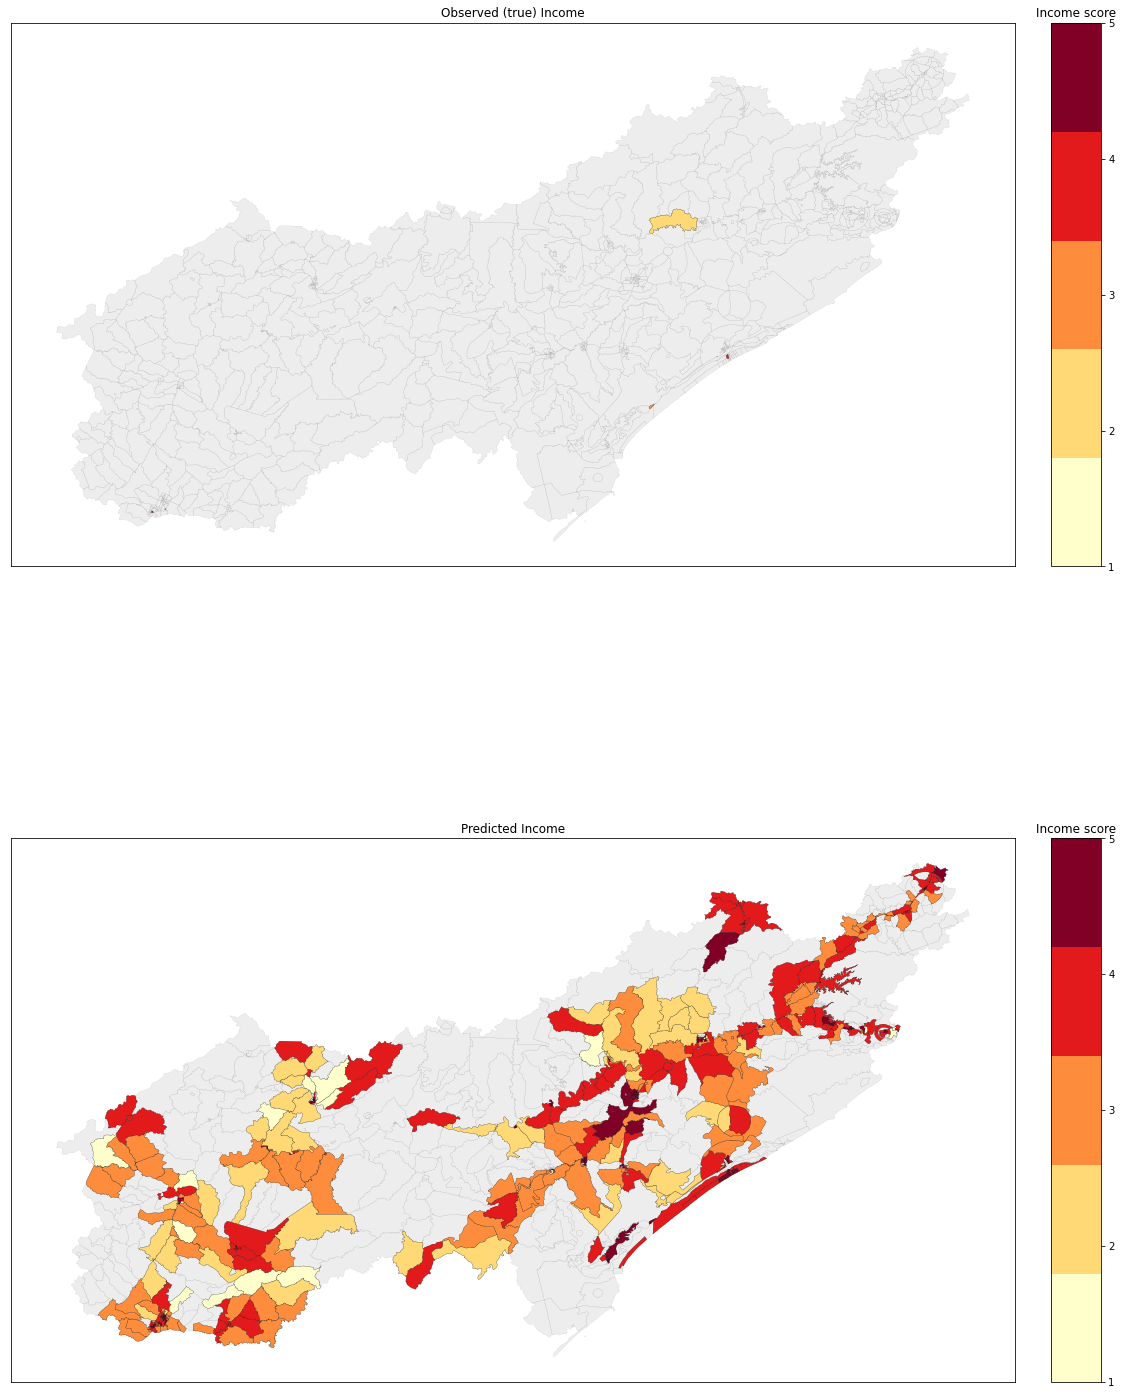

In [54]:
geo = gpd.read_file('raw_data/shapefiles/vale_ribeira.dbf')
df = pd.concat([pd.read_csv(f'{FOLDER[s]}/folds/pred-{FOLD}.csv') for FOLD in range(0,5)], ignore_index=True)
df = pd.merge(df, geo, left_on='setor', right_on='CD_GEOCODI', how='left')

real = df.groupby('setor', as_index=False, group_keys=False).agg(
    {'geometry': lambda x: x.tolist()[0], INDICATOR[s]: lambda x: int(x.mean())})
#    {'geometry': lambda x: x.tolist()[0], INDICATOR[s]: lambda x: int(get_mode(x))})

g_real=gpd.GeoDataFrame(real)#Convert Pandas DataFrame to GeoPandas DataFrame    

pred = df.groupby('setor', as_index=False, group_keys=False).agg(
#{'geometry': lambda x: x.tolist()[0], INDICATOR_PRED[s]: lambda x: int(x.mean())})
{'geometry': lambda x: x.tolist()[0], INDICATOR_PRED[s]: lambda x: int(get_mode(x))})    
g_pred=gpd.GeoDataFrame(pred)

# -- configuring fancy plots params --- 
missing_kwds={"color": "lightgrey",
              "label": "Missing values",
             "linewidth":0.5}
#"edgecolor": "black",#"hatch": "...", "hatch":"///"

cmap = plt.cm.get_cmap('YlOrRd', 5)    # 5 discrete colors
    
fig, axs = plt.subplots(2, 1, figsize=(20*5,5*5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

def plot_colorbar(axes):    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=5))
    sm._A = []
    divider = make_axes_locatable(axes=axes)
    cax = divider.append_axes("right", size="5%", pad=0.5)
    cbar = fig.colorbar(sm, cax=cax,  ticks=[1,2,3,4,5])
    cbar.ax.set_title('Income score')

    
#---- 1st subplot ---- 
axs[0].set_title(f'Observed (true) {INDICATOR_TITLE[s]}')     

# Introduce some missing values:
#g_real.loc[np.random.choice(g_real.index, 120), INDICATOR[s]] = np.nan
geo.plot(color= 'lightgray',alpha=0.4, edgecolor='black', ax=axs[0], linewidth=0.1) #contourn
g_real[g_real.setor.isin(['412220605000053','352610005000021','352042605000010','352042605000004','411125805000002'])].plot(column=INDICATOR[s], ax=axs[0], cmap=cmap,linewidth=0.2,edgecolor='black')#, missing_kwds=missing_kwds)#color-fill

#axs[0].set_axis_off()
axs[0].axes.get_xaxis().set_visible(False)
axs[0].axes.get_yaxis().set_visible(False)
axs[0].set_aspect('equal')
plot_colorbar(axs[0])


#---- 2nd subplot ----     
axs[1].set_title(f'Predicted {INDICATOR_TITLE[s]}')#RdBu

# Introduce some missing values:
#g_pred.loc[np.random.choice(g_pred.index, 120), INDICATOR_PRED[s]] = np.nan

geo.plot(color= 'lightgray',alpha=0.4, edgecolor='black', ax=axs[1], linewidth=0.1)#contourn
g_pred.plot(column=INDICATOR_PRED[s], ax=axs[1],cmap=cmap,linewidth=0.2,edgecolor='black')#, missing_kwds=missing_kwds)#color-fill
#geo.boundary.plot
#axs[1].set_axis_off()
axs[1].axes.get_xaxis().set_visible(False)
axs[1].axes.get_yaxis().set_visible(False)
axs[1].set_aspect('equal')
plot_colorbar(axs[1])


plt.savefig(fname='plots/map_vr_img.pdf', dpi=300, facecolor='w', edgecolor='w')
#plt.savefig(fname='plots/map_prediction.png', dpi=300, facecolor='w', edgecolor='w')
plt.show() 


In [16]:
city_codes = {
    'PARIQUERA-AÇU': 3536208,
    'RIBEIRA': 3542800,
    'ITAÓCA': 3522158,
    'CANANÉIA': 3509908,
    'ELDORADO': 3514809,
    'IGUAPE': 3520301,
    'ILHA COMPRIDA': 3520426,
    'JACUPIRANGA': 3524600,
    'IPORANGA': 3521200,
    'JUQUIÁ': 3526100,
    'ITARIRI': 3523305,
    'JUQUITIBA': 3526209,
    'ITAPIRAPUÃ PAULISTA': 3522653,
    'MIRACATU': 3529906,
    'TAPIRAÍ': 3553500,
    'SÃO LOURENÇO DA SERRA': 3549953,
    'REGISTRO': 3542602,
    'SETE BARRAS': 3551801,
    'PEDRO DE TOLEDO': 3537206,
    'CAJATI': 3509254,
    'CERRO AZUL': 4105201,
    'ITAPERUÇU': 4111258,
    'BOCAIÚVA DO SUL': 4103107,
    'TUNAS DO PARANÁ': 4127882,
    'RIO BRANCO DO SUL': 4122206,
    'BARRA DO TURVO': 3505401,
    'APIAÍ': 3502705,
    'BARRA DO CHAPÉU': 3505351,
    'DOUTOR ULYSSES': 4128633,
    'ADRIANÓPOLIS': 4100202
}


KeyError: 'setor'

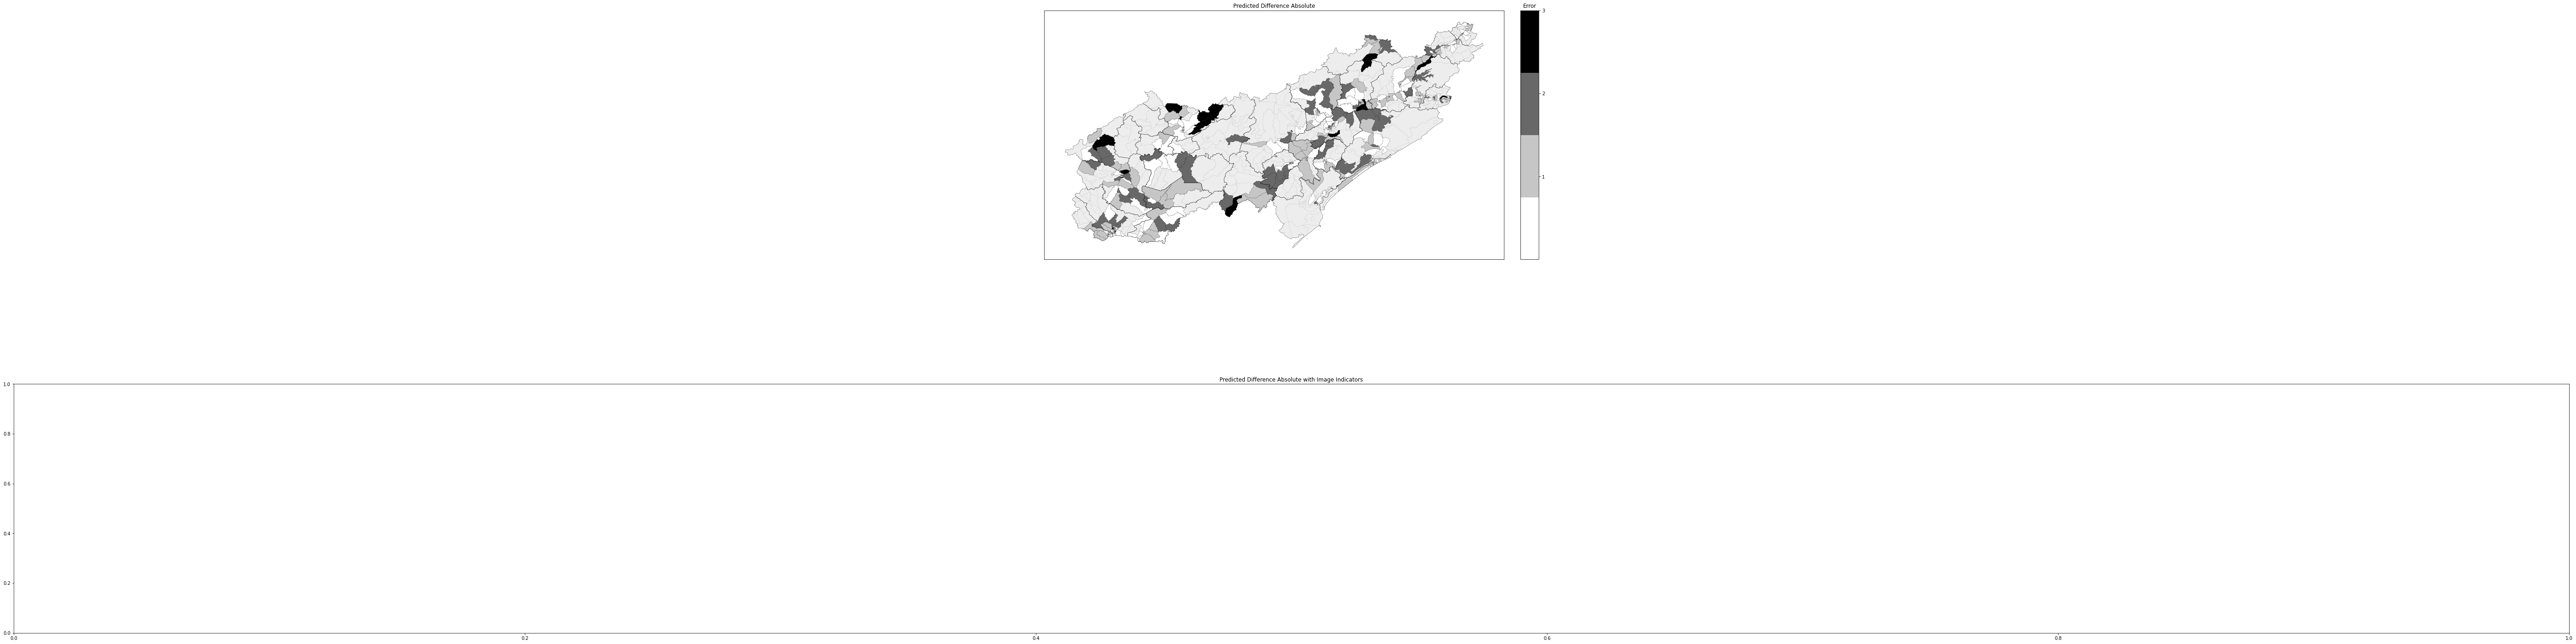

In [55]:
from shapely.geometry import Point, Polygon

vr = gpd.read_file('raw_data/shapefiles/censo2010_municipios_valeRibeira/censo2010municipios_valedaRibeira.dbf')


g_dif = pd.merge(g_real, g_pred[['setor','quintilRendaPred']], on="setor")
g_dif['diff'] = g_dif['quintilRenda'] - g_dif['quintilRendaPred']
g_dif['diff_abs'] = (g_dif['quintilRenda'] - g_dif['quintilRendaPred']).abs()

 
cmap = plt.cm.get_cmap('YlOrRd', 5)    # 5 discrete colors
diverging_cmap_4 = plt.cm.get_cmap('Greys', 4)    # 4 discrete colors #'Accent'
diverging_cmap_7 = plt.cm.get_cmap('hsv', 7)    # 7 discrete colors
    
fig, axs = plt.subplots(2, 1, figsize=(20*5,5*5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)



def plot_colorbar(axes, cmap, values, init, end, text):    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=init, vmax=end))
    sm._A = []
    divider = make_axes_locatable(axes=axes)
    cax = divider.append_axes("right", size=str(values)+"%", pad=0.5)
    cbar = fig.colorbar(sm, cax=cax,  ticks=list(range(1, values)))
    cbar.ax.set_title(text)
    
#---- 4th subplot ----     
axs[0].set_title(f'Predicted Difference Absolute')#RdBu

vr.boundary.plot(edgecolor='black',ax=axs[0], linewidth=0.3) #contourn
geo.plot(color= 'lightgray',alpha=0.4, edgecolor='black', ax=axs[0], linewidth=0.1)#contourn
g_dif.plot(column='diff_abs', ax=axs[0],cmap=diverging_cmap_4,linewidth=0.2,edgecolor='black')#, missing_kwds=missing_kwds)#color-fill
#geo.boundary.plot
#axs[0].set_axis_off()
axs[0].axes.get_xaxis().set_visible(False)
axs[0].axes.get_yaxis().set_visible(False)
axs[0].set_aspect('equal')
plot_colorbar(axs[0],diverging_cmap_4,4,0,3,'Error')

#---- 5th subplot ---- 
axs[1].set_title(f'Predicted Difference Absolute with Image Indicators')

from matplotlib.patches import Patch
 
vale = gpd.read_file('raw_data/shapefiles/setoresCensitarios_VR.shp')
count_setor = geo.groupby('setor')['uf'].count()
vale['photos'] = vale['CD_GEOCODI'].map(count_setor).fillna(0)
vale['has_photos'] = (vale['photos'] >=1).astype(int)


#vr.boundary.plot(edgecolor='black',ax=axs[1], linewidth=0.3) #contourn
geo.plot(color= 'lightgray',alpha=0.4, edgecolor='black', ax=axs[1], linewidth=0.1)#contourn
g_dif.plot(column='diff_abs', ax=axs[1],cmap=diverging_cmap_4,linewidth=0.2,edgecolor='black')#, missing_kwds=missing_kwds)#color-fill


for city in geo['city'].unique():
    city_dots = geo[geo['city'] == city]    
    #print(city)
    city_area = vale[vale['CD_GEOCODM'] == str(city_codes[city])]
    
    images_plot = city_dots.plot(ax=axs[1], markersize=0.2, color='red',linewidth=0.2) #streets


axs[1].axes.get_xaxis().set_visible(False)
axs[1].axes.get_yaxis().set_visible(False)
axs[1].set_aspect('equal')
plot_colorbar(axs[1],diverging_cmap_4,4,0,3,'Error')




#plt.savefig(fname='plots/map_prediction.pdf', dpi=300, facecolor='w', edgecolor='w')
#plt.savefig(fname='plots/map_prediction.png', dpi=300, facecolor='w', edgecolor='w')
#plt.show() 


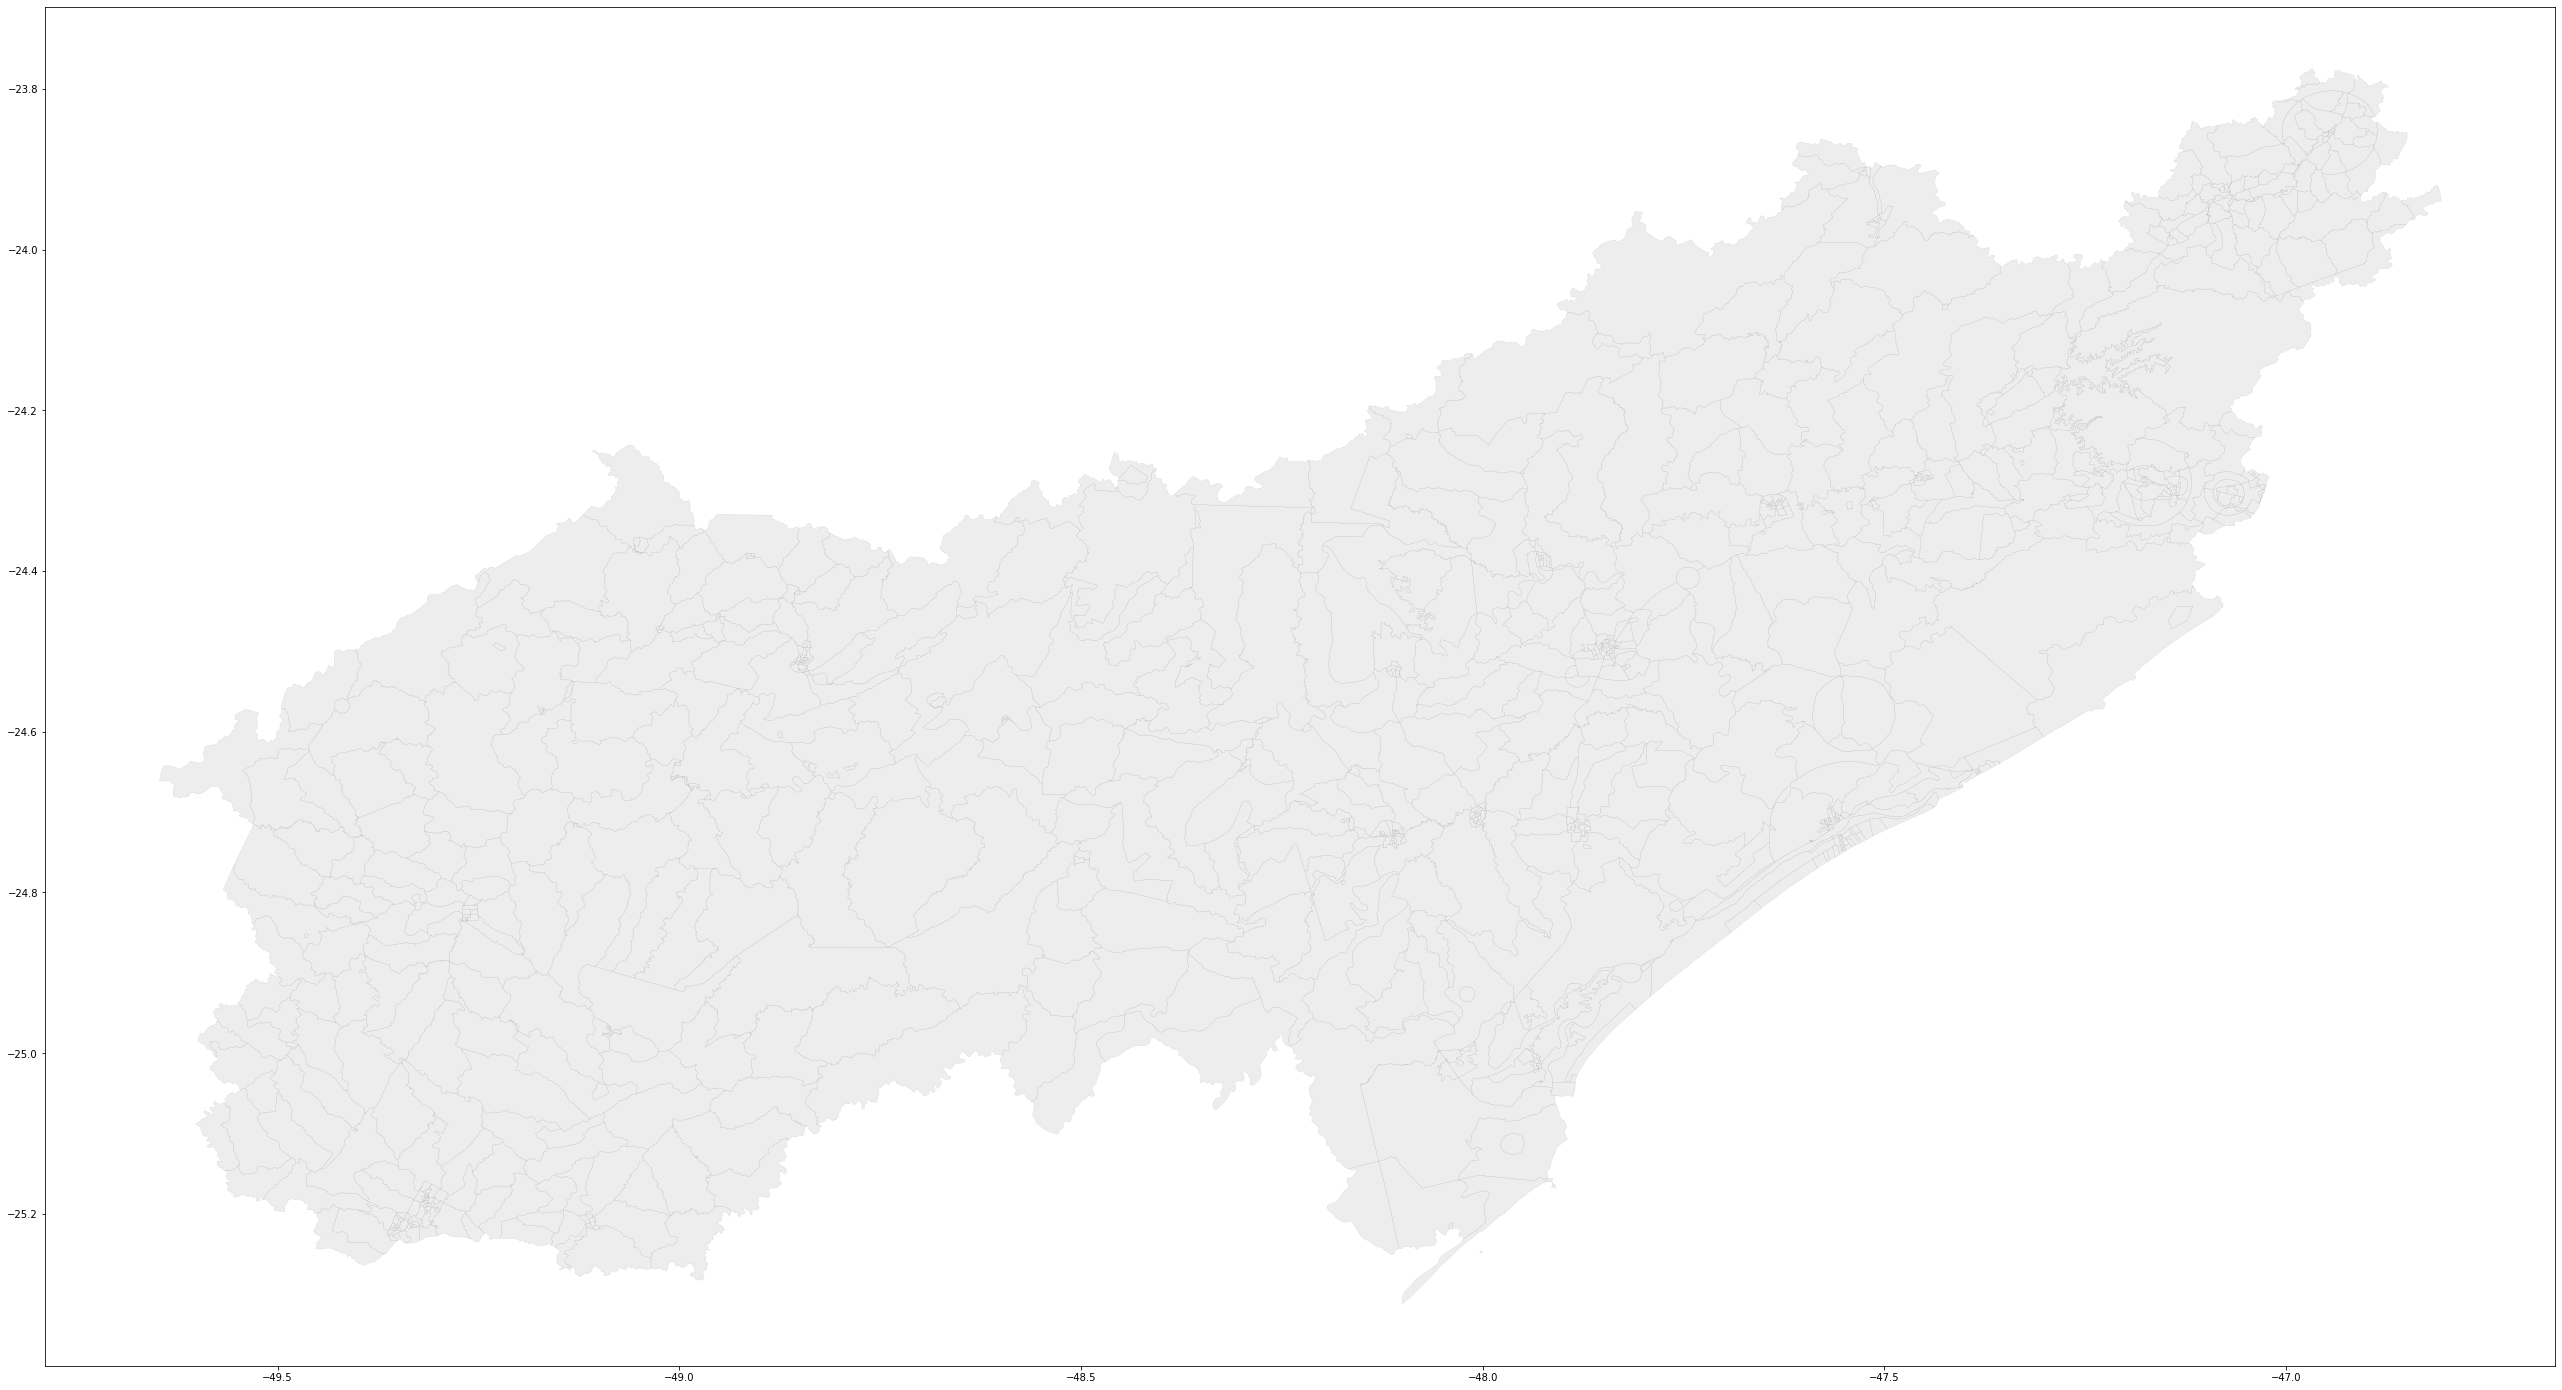

In [56]:
geo = gpd.read_file('raw_data/shapefiles/vale_ribeira.dbf')
    
fig, axs = plt.subplots(1, 1, figsize=(20*5,5*5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
geo.plot(color= 'lightgray',alpha=0.4, edgecolor='black', ax=axs, linewidth=0.1)#contourn

plt.savefig(fname='plots/map_vr.pdf', dpi=300, facecolor='w', edgecolor='w')
plt.show()

In [57]:
def plot_image(score, w,h):
    _, axs = plt.subplots(w, h, figsize=(5,5))
    plt.suptitle(f'Samples for {INDICATOR_TITLE[s]} with score = {score}')      

    df = pd.DataFrame(columns=['city','setor','latitude', 'longitude', 'filename','score'])
    sample = ds[ds[INDICATOR[s]] == score].sample(w*h)
    for i in tqdm(range(0,w * h), leave=False):            
        row = sample.iloc[i] 
        print('Cidade: ',row['city'],' Setor:', row['setor'], ' Lat:', row['latitude'], ' Long:', row['longitude'], ' File:', row['filename'], ' Score:', score)
        df = df.append({'city':row['city'],'setor':row['setor'], 'latitute':row['latitude'], 'longitude': row['longitude'], 'filename':row['filename'],'score':score}, ignore_index=True)
        axs[i%w][i//h].imshow(get_image(row['pano_id'], row['direction']))
    return df

----- score = 1 -------


  0%|          | 0/4 [00:00<?, ?it/s]

Cidade:  MIRACATU  Setor: 352030105000046.0  Lat: -24.380188105003985  Long: -47.51518924957545  File: jOVp61TNhuWOQtOv_l8fQw-270.jpg  Score: 1


 25%|██▌       | 1/4 [00:01<00:04,  1.34s/it]

Cidade:  ITARIRI  Setor: 352330510000010.0  Lat: -24.29344287264793  Long: -47.026817616742036  File: 1i0JFqMiwrbe8G-HEKhnEg-90.jpg  Score: 1


 50%|█████     | 2/4 [00:03<00:03,  1.61s/it]

Cidade:  SETE BARRAS  Setor: 355180105000026.0  Lat: -24.3628817  Long: -47.9402667  File: dokfzUSiCIQgiRwdHsg4kQ-180.jpg  Score: 1


 75%|███████▌  | 3/4 [00:04<00:01,  1.41s/it]

Cidade:  MIRACATU  Setor: 352990608000005.0  Lat: -24.32732115861721  Long: -47.56803498139165  File: LhVCwnoq-z69fufbV2H6WQ-180.jpg  Score: 1


  0%|          | 0/4 [00:00<?, ?it/s]        

----- score = 2 -------
Cidade:  BOCAIÚVA DO SUL  Setor: 410310705000022.0  Lat: -25.231797251556877  Long: -49.12212606614697  File: nNPhnvo-ICepcGvYd93GCg-180.jpg  Score: 2


 25%|██▌       | 1/4 [00:01<00:04,  1.62s/it]

Cidade:  CERRO AZUL  Setor: 410310705000011.0  Lat: -25.07576433462081  Long: -49.08546214639491  File: ZQZMnGuX45UnVucGQZVMSw-0.jpg  Score: 2


 50%|█████     | 2/4 [00:04<00:03,  1.86s/it]

Cidade:  RIO BRANCO DO SUL  Setor: 412220605000019.0  Lat: -25.17129933623546  Long: -49.31819875043229  File: uT_-AtNN7Km0DBcU7TCqkg-0.jpg  Score: 2


 75%|███████▌  | 3/4 [00:05<00:01,  1.74s/it]

Cidade:  RIO BRANCO DO SUL  Setor: 412220605000052.0  Lat: -25.17243730391159  Long: -49.31391487240532  File: Op2PAxLC6BC6tRccZGK3Rw-0.jpg  Score: 2


----- score = 3 -------


  0%|          | 0/4 [00:00<?, ?it/s]

Cidade:  RIO BRANCO DO SUL  Setor: 412220605000020.0  Lat: -25.19252160000001  Long: -49.2964211  File: Jq-vOCbsSMso1oC9MDxZhQ-90.jpg  Score: 3


 25%|██▌       | 1/4 [00:00<00:02,  1.19it/s]

Cidade:  ITAPERUÇU  Setor: 411125805000014.0  Lat: -25.21106630199623  Long: -49.331285306469574  File: DVtNlpsdt0VkpttL50JvRA-270.jpg  Score: 3


 50%|█████     | 2/4 [00:02<00:02,  1.07s/it]

Cidade:  MIRACATU  Setor: 352990605000006.0  Lat: -24.290180132917442  Long: -47.46415457363626  File: UBXWs_B9nEBtXDfHOQH6bg-90.jpg  Score: 3


 75%|███████▌  | 3/4 [00:03<00:00,  1.01it/s]

Cidade:  ITAPERUÇU  Setor: 411125805000012.0  Lat: -25.21264092278303  Long: -49.33629960237867  File: ujwLZ6locIFhFK4vq57hjQ-180.jpg  Score: 3


  0%|          | 0/4 [00:00<?, ?it/s]        

----- score = 4 -------
Cidade:  ITAPERUÇU  Setor: 411125805000016.0  Lat: -25.2217119  Long: -49.3436985  File: VmOJTBWUMY0RKj5DO7qfkQ-270.jpg  Score: 4


 25%|██▌       | 1/4 [00:01<00:04,  1.59s/it]

Cidade:  ILHA COMPRIDA  Setor: 352042605000013.0  Lat: -24.73793230540617  Long: -47.54934432822606  File: mWz7GbzAcFh9bHfBXBFH2g-90.jpg  Score: 4


 50%|█████     | 2/4 [00:03<00:03,  1.57s/it]

Cidade:  JACUPIRANGA  Setor: 352460005000017.0  Lat: -24.707762011413532  Long: -48.01612485567931  File: cyF5Dx91QmozQ75jE0z9ZA-0.jpg  Score: 4


 75%|███████▌  | 3/4 [00:04<00:01,  1.56s/it]

Cidade:  JACUPIRANGA  Setor: 352460005000008.0  Lat: -24.70580386062061  Long: -48.01342417426596  File: R9idldma6go3bPB6R_BwQA-90.jpg  Score: 4


  0%|          | 0/4 [00:00<?, ?it/s]        

----- score = 5 -------
Cidade:  JACUPIRANGA  Setor: 352460005000003.0  Lat: -24.7129129748423  Long: -48.00154226397463  File: KhnF1dY6H8FPbABYUReZyA-180.jpg  Score: 5


 25%|██▌       | 1/4 [00:01<00:03,  1.31s/it]

Cidade:  RIO BRANCO DO SUL  Setor: 412220605000004.0  Lat: -25.18502828233206  Long: -49.31946920121225  File: XOfB58i3YN6eeGTJ7TF72g-0.jpg  Score: 5


 50%|█████     | 2/4 [00:02<00:02,  1.17s/it]

Cidade:  ILHA COMPRIDA  Setor: 352042605000028.0  Lat: -24.751089  Long: -47.5630375  File: YSqFhuHAfGcQpWECo7H7lg-0.jpg  Score: 5


 75%|███████▌  | 3/4 [00:03<00:01,  1.25s/it]

Cidade:  CERRO AZUL  Setor: 410520105000005.0  Lat: -24.824201841704745  Long: -49.262163846492264  File: Whf34pMiymU3inbhuU0EcA-270.jpg  Score: 5


,city,setor,latitude,longitude,filename,score,latitute
0,MIRACATU,3.520301e+14,NaN,-47.515189,jOVp61TNhuWOQtOv_l8fQw-270.jpg,1,-24.380188
1,ITARIRI,3.523305e+14,NaN,-47.026818,1i0JFqMiwrbe8G-HEKhnEg-90.jpg,1,-24.293443
2,SETE BARRAS,3.551801e+14,NaN,-47.940267,dokfzUSiCIQgiRwdHsg4kQ-180.jpg,1,-24.362882
3,MIRACATU,3.529906e+14,NaN,-47.568035,LhVCwnoq-z69fufbV2H6WQ-180.jpg,1,-24.327321
0,BOCAIÚVA DO SUL,4.103107e+14,NaN,-49.122126,nNPhnvo-ICepcGvYd93GCg-180.jpg,2,-25.231797
1,CERRO AZUL,4.103107e+14,NaN,-49.085462,ZQZMnGuX45UnVucGQZVMSw-0.jpg,2,-25.075764
2,RIO BRANCO DO SUL,4.122206e+14,NaN,-49.318199,uT_-AtNN7Km0DBcU7TCqkg-0.jpg,2,-25.171299
3,RIO BRANCO DO SUL,4.122206e+14,NaN,-49.313915,Op2PAxLC6BC6tRccZGK3Rw-0.jpg,2,-25.172437
0,RIO BRANCO DO SUL,4.122206e+14,NaN,-49.296421,Jq-vOCbsSMso1oC9MDxZhQ-90.jpg,3,-25.192522
1,ITAPERUÇU,4.111258e+14,NaN,-49.331285,DVtNlpsdt0VkpttL50JvRA-270.jpg,3,-25.211066


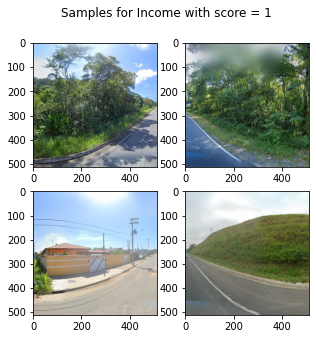

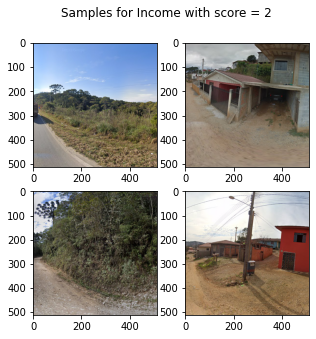

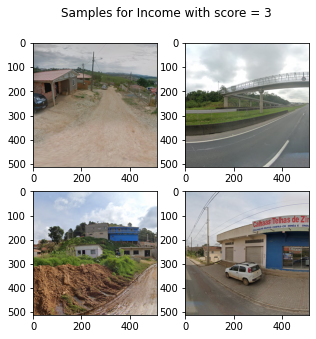

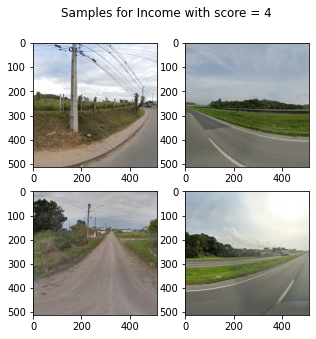

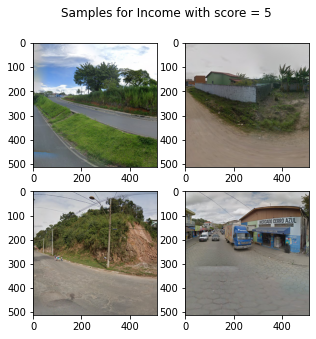

In [58]:
photo_df = pd.DataFrame(columns=['city','setor','latitude', 'longitude', 'filename','score'])
for s in range(0,len(INDICATOR)):
    df = pd.read_csv('geo_fold.csv') 
    idh = pd.read_csv('IDHMs/IDHM_ValeRibeira.csv')
    ds = pd.merge(df, idh, left_on='setor', right_on='Cod_setor', how='inner')
    
    print('----- score = 1 -------')
    photo_df = pd.concat([photo_df, plot_image(score=1, w=2,h=2)])
    print('----- score = 2 -------')
    photo_df = pd.concat([photo_df, plot_image(score=2, w=2,h=2)])
    print('----- score = 3 -------')
    photo_df = pd.concat([photo_df, plot_image(score=3, w=2,h=2)])
    print('----- score = 4 -------')
    photo_df = pd.concat([photo_df, plot_image(score=4, w=2,h=2)])
    print('----- score = 5 -------')
    photo_df = pd.concat([photo_df, plot_image(score=5, w=2,h=2)])

photo_df

In [59]:
photo_df

,city,setor,latitude,longitude,filename,score,latitute
0,MIRACATU,3.520301e+14,NaN,-47.515189,jOVp61TNhuWOQtOv_l8fQw-270.jpg,1,-24.380188
1,ITARIRI,3.523305e+14,NaN,-47.026818,1i0JFqMiwrbe8G-HEKhnEg-90.jpg,1,-24.293443
2,SETE BARRAS,3.551801e+14,NaN,-47.940267,dokfzUSiCIQgiRwdHsg4kQ-180.jpg,1,-24.362882
3,MIRACATU,3.529906e+14,NaN,-47.568035,LhVCwnoq-z69fufbV2H6WQ-180.jpg,1,-24.327321
0,BOCAIÚVA DO SUL,4.103107e+14,NaN,-49.122126,nNPhnvo-ICepcGvYd93GCg-180.jpg,2,-25.231797
1,CERRO AZUL,4.103107e+14,NaN,-49.085462,ZQZMnGuX45UnVucGQZVMSw-0.jpg,2,-25.075764
2,RIO BRANCO DO SUL,4.122206e+14,NaN,-49.318199,uT_-AtNN7Km0DBcU7TCqkg-0.jpg,2,-25.171299
3,RIO BRANCO DO SUL,4.122206e+14,NaN,-49.313915,Op2PAxLC6BC6tRccZGK3Rw-0.jpg,2,-25.172437
0,RIO BRANCO DO SUL,4.122206e+14,NaN,-49.296421,Jq-vOCbsSMso1oC9MDxZhQ-90.jpg,3,-25.192522
1,ITAPERUÇU,4.111258e+14,NaN,-49.331285,DVtNlpsdt0VkpttL50JvRA-270.jpg,3,-25.211066


In [60]:
g_dif


,setor,geometry,quintilRenda,quintilRendaPred,diff,diff_abs
0,3.502705e+14,"POLYGON ((-48.84580 -24.51313, -48.84650 -24.5...",5.0,5,0.0,0.0
1,3.502705e+14,"POLYGON ((-48.84489 -24.51740, -48.84509 -24.5...",5.0,5,0.0,0.0
2,3.502705e+14,"POLYGON ((-48.85038 -24.52333, -48.85048 -24.5...",5.0,5,0.0,0.0
3,3.502705e+14,"POLYGON ((-48.84511 -24.52691, -48.85691 -24.5...",5.0,5,0.0,0.0
4,3.502705e+14,"POLYGON ((-48.84589 -24.51157, -48.84659 -24.5...",5.0,5,0.0,0.0
...,...,...,...,...,...,...
495,4.128633e+14,"POLYGON ((-49.31758 -24.72328, -49.31496 -24.7...",2.0,3,-1.0,1.0
496,4.128633e+14,"POLYGON ((-49.39916 -24.70718, -49.35284 -24.6...",1.0,3,-2.0,2.0
497,4.128633e+14,"POLYGON ((-49.37073 -24.61246, -49.36844 -24.6...",1.0,3,-2.0,2.0
498,4.128633e+14,"POLYGON ((-49.46065 -24.62345, -49.46026 -24.6...",1.0,3,-2.0,2.0


In [61]:
geo = pd.read_csv('geo.csv',
                      usecols=['city','direction','filename','latitude','longitude','setor']) #this is not necessary, geo.csv is on all folders
geo

,city,direction,filename,latitude,longitude,setor
0,APIAÍ,0,amYzj4DUMQbgHzB9M3a_WA-0.jpg,-24.514697,-48.846783,3.502705e+14
1,APIAÍ,90,amYzj4DUMQbgHzB9M3a_WA-90.jpg,-24.514697,-48.846783,3.502705e+14
2,APIAÍ,180,amYzj4DUMQbgHzB9M3a_WA-180.jpg,-24.514697,-48.846783,3.502705e+14
3,APIAÍ,270,amYzj4DUMQbgHzB9M3a_WA-270.jpg,-24.514697,-48.846783,3.502705e+14
4,APIAÍ,0,LoaIOwDck-H26nB1MZdD7Q-0.jpg,-24.514405,-48.846691,3.502705e+14
...,...,...,...,...,...,...
112363,DOUTOR ULYSSES,270,oSXOgE7j3mV9lfiPJMwySA-270.jpg,-24.646414,-49.425382,4.128633e+14
112364,DOUTOR ULYSSES,0,VknK6sWJIKFoVDOPr94viA-0.jpg,-24.625669,-49.418806,4.128633e+14
112365,DOUTOR ULYSSES,90,VknK6sWJIKFoVDOPr94viA-90.jpg,-24.625669,-49.418806,4.128633e+14
112366,DOUTOR ULYSSES,180,VknK6sWJIKFoVDOPr94viA-180.jpg,-24.625669,-49.418806,4.128633e+14


In [62]:
geo_img = geo.groupby(['setor']).count()

In [63]:
geo_img

,city,direction,filename,latitude,longitude
setor,,,,,
3.502705e+14,16,16,16,16,16
3.502705e+14,180,180,180,180,180
3.502705e+14,128,128,128,128,128
3.502705e+14,264,264,264,264,264
3.502705e+14,116,116,116,116,116
...,...,...,...,...,...
4.128633e+14,80,80,80,80,80
4.128633e+14,52,52,52,52,52
4.128633e+14,24,24,24,24,24


In [64]:
geo_img = geo_img.reset_index()

In [70]:
g_ins = pd.merge(g_dif, geo_img[['setor','filename']], on="setor")
g_ins['filename'] = g_ins['filename']/4 
g_ins

,setor,geometry,quintilRenda,quintilRendaPred,diff,diff_abs,filename
0,3.502705e+14,"POLYGON ((-48.84580 -24.51313, -48.84650 -24.5...",5.0,5,0.0,0.0,4.0
1,3.502705e+14,"POLYGON ((-48.84489 -24.51740, -48.84509 -24.5...",5.0,5,0.0,0.0,45.0
2,3.502705e+14,"POLYGON ((-48.85038 -24.52333, -48.85048 -24.5...",5.0,5,0.0,0.0,32.0
3,3.502705e+14,"POLYGON ((-48.84511 -24.52691, -48.85691 -24.5...",5.0,5,0.0,0.0,66.0
4,3.502705e+14,"POLYGON ((-48.84589 -24.51157, -48.84659 -24.5...",5.0,5,0.0,0.0,29.0
...,...,...,...,...,...,...,...
495,4.128633e+14,"POLYGON ((-49.31758 -24.72328, -49.31496 -24.7...",2.0,3,-1.0,1.0,20.0
496,4.128633e+14,"POLYGON ((-49.39916 -24.70718, -49.35284 -24.6...",1.0,3,-2.0,2.0,13.0
497,4.128633e+14,"POLYGON ((-49.37073 -24.61246, -49.36844 -24.6...",1.0,3,-2.0,2.0,6.0
498,4.128633e+14,"POLYGON ((-49.46065 -24.62345, -49.46026 -24.6...",1.0,3,-2.0,2.0,2.0


In [72]:
g_ins['quintilRendaInt'] = g_ins['quintilRenda'].astype(np.int)

In [73]:
g_ins['Prediction Absolute Difference'] = g_ins['diff_abs'].astype(np.int)

/Users/dant/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


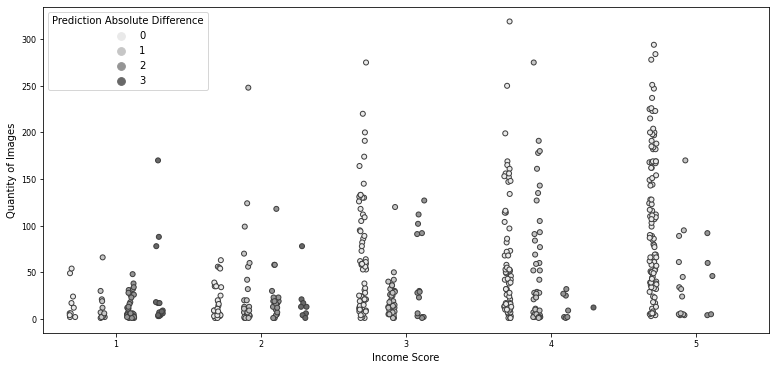

In [76]:
plt.figure(figsize=(13,6))

#ax = sns.boxplot(x="quintilRenda", y="filename", data=g_ins.sort_values(by=["quintilRenda"]) , palette="Set3")
#my_cmap = plt.cm.get_cmap('gray_r',4)

cpal = sns.color_palette('Greys',n_colors=5,desat=1.)
#cpal = sns.color_palette('Set3',n_colors=5,desat=1.)

ax = sns.stripplot(x="quintilRendaInt", y="filename",data=g_ins.sort_values(by=["quintilRenda"]),hue="Prediction Absolute Difference", palette=cpal,split=True,linewidth=1,edgecolor='gray')
ax.set_xlabel("Income Score",fontsize=10)
ax.set_ylabel("Quantity of Images",fontsize=10)
ax.tick_params(labelsize=8)
plt.savefig('./plots/predictions_abs_diff.pdf')


In [39]:
def get_mode(x):
    # Imports
    from collections import Counter
    import random
    
    # Set Seed
    random.seed(123)
    
    data = Counter(x)
    mc_value, mc_occurrence = data.most_common(1)[0]
    most_common_list = []
    for value, occurrence in data.most_common():
        if mc_occurrence == occurrence:
            most_common_list.append(value)
    return random.choice(most_common_list)


In [48]:

# Teste
x = [1, 1, 1, 1, 2, 2, 2, 2, 3]
print(get_mode(x))

1


Text(33.0, 0.5, 'Observed (true) score')

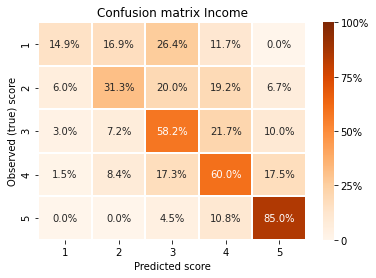

In [122]:
cf_result = confusion_matrix(g_ins["quintilRenda"], g_ins["quintilRendaPred"])

plt.figure(figsize=(6,4))
ax=sns.heatmap(cf_result/cf_result.astype(np.float).sum(axis=1), xticklabels=range(1,5+1),yticklabels=range(1,5+1),
            annot=True, 
            fmt='.1%', cmap='Oranges',
            vmin=0, vmax=1,
           linewidths=1)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .5, .75, 1])
cbar.set_ticklabels(['0', '25%', '50%', '75%', '100%'])
plt.title("Confusion matrix "+ INDICATOR_TITLE[s])
plt.xlabel('Predicted score')
plt.ylabel('Observed (true) score')    
#plt.savefig(fname=f'plots/confmatrix-{INDICATOR_TITLE[s]}.pdf', dpi=300, facecolor='w', edgecolor='w')
#plt.savefig(fname=f'plots/confmatrix-{INDICATOR_TITLE[s]}.png', dpi=300, facecolor='w', edgecolor='w')

In [94]:
cf_result

array([[ 10,  14,  29,  14,   0],
       [  4,  26,  22,  23,   8],
       [  2,   6,  64,  26,  12],
       [  1,   7,  19,  72,  21],
       [  0,   0,   5,  13, 102]])